In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [65]:
df = pd.read_csv("candy-data.csv")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.1 KB


Data here is already in the form as we want as there are no objects and formats other than int and float.
So less overhead of converting categories using OneHotEncoder and Mapping.

In [130]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


Also there are no columns and specific fields to clean here so we proceed with test-train-split by selecting specific predictors and target column for our model.

In [66]:
df.drop('competitorname',axis=1,inplace=True)

In [ ]:
df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [68]:
(df.corr())

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarpercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


In [187]:
X = df.drop(['chocolate'],axis=1)
y = df.chocolate

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Standardization as we want to scale the value closer to zero ; basically to reduce the overhead and standardizing datafields in a specific standard format which we want. 

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaller = StandardScaler()

Scaller model instantiation and fitting first with X_train and then just tranform for X_test as we dont need data leaks for prediction.

In [192]:
X_train_scalled = scaller.fit_transform(X_train)
X_test_scalled = scaller.transform(X_test)

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
model = LogisticRegression()

In [195]:
model.fit(X_train_scalled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [196]:
model.coef_

array([[-1.40586902, -0.1666294 , -0.21034678, -0.33629862,  0.4180757 ,
         0.01889928,  0.68589616, -0.07072287, -0.14643482,  0.37217323,
         1.54345495]])

In [197]:
model.intercept_

array([-0.3060581])

In [198]:
y_predictions = model.predict(X_test_scalled)

In [199]:
y_predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [200]:
y_test

78    0
0     1
68    0
22    1
12    0
82    0
10    1
18    0
4     0
66    0
40    1
47    1
35    1
72    0
55    0
54    1
33    1
Name: chocolate, dtype: int64

The predictions pretty accurate if we compare.

In [201]:
from sklearn.metrics import accuracy_score

In [202]:
print(f"The accuracy score of the model is : {accuracy_score(y_predictions,y_test)}")

The accuracy score of the model is : 0.9411764705882353


A very good accuracy score.

In [203]:
from sklearn.metrics import classification_report

In [204]:
print(classification_report(y_predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.88      1.00      0.93         7

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



All the above parameters seem reasonable and well done for the model.

In [205]:
from sklearn.metrics import confusion_matrix

In [206]:
conf_matr = (confusion_matrix(y_predictions,y_test))
conf_matr

array([[9, 1],
       [0, 7]])

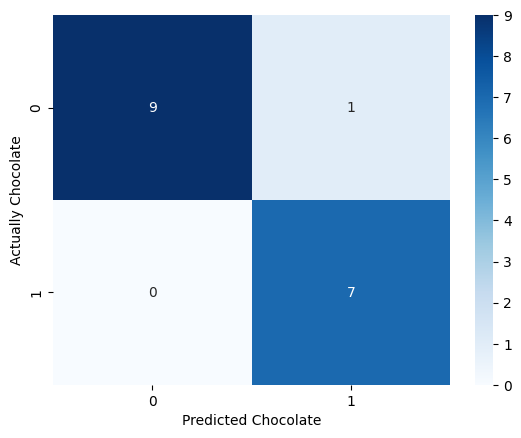

In [207]:
sns.heatmap(
                conf_matr,
                cmap = 'Blues',
                annot=True
)
plt.xlabel("Predicted Chocolate")
plt.ylabel("Actually Chocolate")
plt.show()

In [208]:
from sklearn.metrics import roc_auc_score

In [209]:
print(roc_auc_score(y_predictions,y_test))

0.9500000000000001


In [210]:
from sklearn.model_selection import cross_val_score

In [211]:
score = cross_val_score(model,X_train_scalled,y_train,cv=5,scoring='accuracy')

In [212]:
print(score.mean())

0.8967032967032967


By looking at the confusion matrix , roc score and cross val score mean I think the model did a great job classifying .

This logistic regression was to easy as we had to just classify whether the candy had chocolate or not and the dat was already in the required format, which eventually helped me as I almost did no data preprocessing . The model also did a good job as we got a good ROC score , precision and cross_val_mean with accurac score included. I tried removing columns which are not relevant but I think for this logistic regression it is fine as it is now .